In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('Algerian_cleaned_data.csv')

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [13]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [14]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [15]:
df['Classes'].value_counts()

Classes
fire             78
not fire         41
not fire          1
not fire          1
Name: count, dtype: int64

In [16]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)


In [17]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [18]:
df['Classes'].value_counts()

Classes
1    78
0    43
Name: count, dtype: int64

In [19]:
#indepenendy variables
X = df.drop('Classes',axis=1)
#dependent variable
y = df['Classes']

In [20]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9
...,...,...,...,...,...,...,...,...,...,...
116,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
117,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
118,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
119,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
116    1
117    0
118    0
119    0
120    0
Name: Classes, Length: 121, dtype: int32

In [22]:
#train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
X_train.corr() #MULTICOLLINEARITY CHECKED

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.516221,-0.148683,-0.135914,0.587525,0.404227,0.331249,0.529565,0.391978,0.487601
RH,-0.516221,1.000000,0.014511,0.195940,-0.673630,-0.369996,-0.274098,-0.701824,-0.356503,-0.596763
Ws,-0.148683,0.014511,1.000000,-0.139414,0.098500,0.089629,0.069449,0.199996,0.087771,0.180650
Rain,-0.135914,0.195940,-0.139414,1.000000,-0.532790,-0.344343,-0.349494,-0.419341,-0.354044,-0.400974
FFMC,0.587525,-0.673630,0.098500,-0.532790,1.000000,0.570826,0.491637,0.767946,0.570128,0.710486
DMC,0.404227,-0.369996,0.089629,-0.344343,0.570826,1.000000,0.919766,0.652202,0.992267,0.864053
DC,0.331249,-0.274098,0.069449,-0.349494,0.491637,0.919766,1.000000,0.511397,0.941726,0.741057
ISI,0.529565,-0.701824,0.199996,-0.419341,0.767946,0.652202,0.511397,1.000000,0.640169,0.934366
BUI,0.391978,-0.356503,0.087771,-0.354044,0.570128,0.992267,0.941726,0.640169,1.000000,0.858091
FWI,0.487601,-0.596763,0.180650,-0.400974,0.710486,0.864053,0.741057,0.934366,0.858091,1.000000


<Axes: >

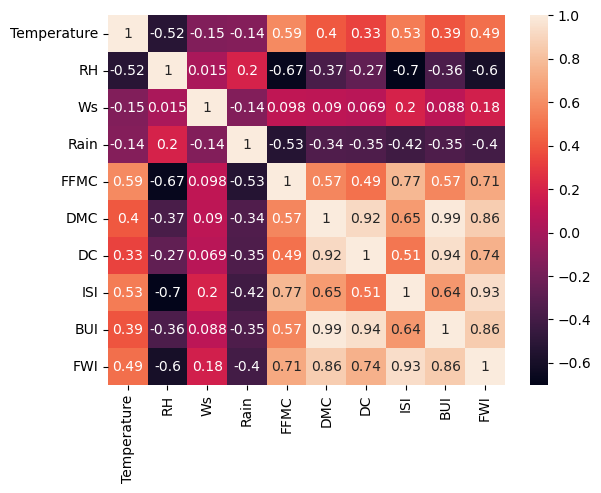

In [24]:
plt.Figure(figsize=(12,6))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [25]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features = correlation(X_train,0.85)# threashold = 0.85


In [27]:
corr_features

{'BUI', 'DC', 'DMC', 'ISI'}

In [28]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((90, 6), (31, 6))

In [29]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled

array([[ 0.50670746,  0.74034875,  0.0882538 , -0.4015985 ,  0.14296971,
        -0.10092743],
       [-0.05284679,  0.25900746,  0.50629812,  0.03612997, -0.55723404,
        -0.91915112],
       [-0.61240104,  0.46529658,  0.0882538 , -0.46413113,  0.19239585,
        -0.63455158],
       [-0.05284679,  0.12148137,  0.50629812, -0.46413113,  0.53837888,
         0.05323066],
       [ 0.50670746, -1.46006859,  0.92434244, -0.46413113,  0.92555037,
         1.54737826],
       [-1.45173241,  0.19024442,  1.34238676,  0.9115869 , -1.42219162,
        -0.95472606],
       [ 1.62581595,  0.60282267, -2.42001211,  0.28626052, -0.59018481,
        -0.93100944],
       [-2.5708409 , -0.08480775,  1.34238676, -0.4015985 , -0.10416103,
        -0.93100944],
       [-0.89217816, -0.9787273 ,  0.0882538 , -0.46413113,  0.69489502,
         0.1718138 ],
       [ 0.22693033,  0.19024442,  1.34238676, -0.46413113,  0.57956734,
         0.15995548],
       [ 0.78648458,  0.46529658,  0.50629812, -0.

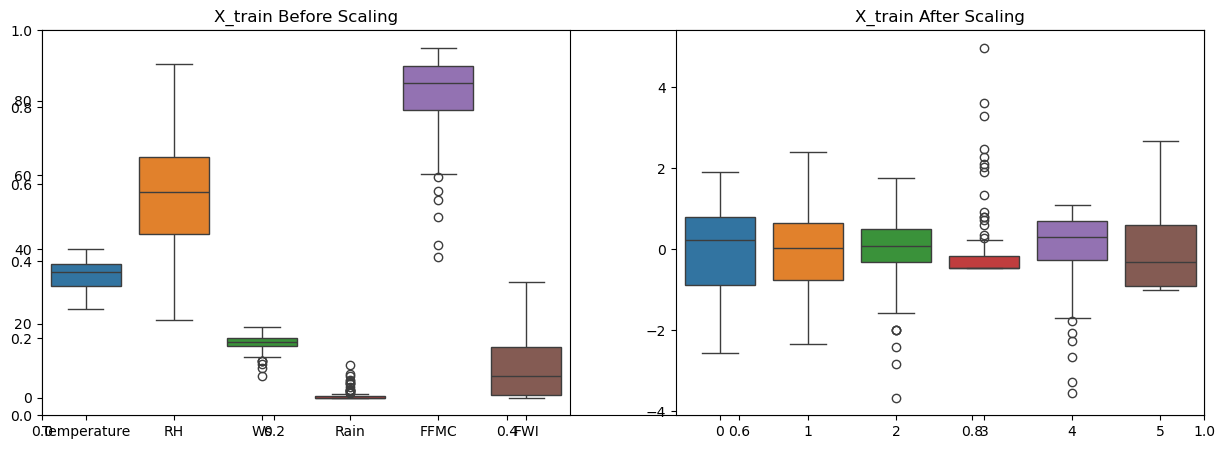

In [31]:
plt.subplots(figsize=(15,5)) 
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')


plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.show()

In [32]:
# lets train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Squared Error : ",mse)
print('R2 Score : ',score)


Mean Squared Error :  0.07242554930931913
R2 Score :  0.6836320323352014


Mean Absolute Error :  0.4580645161290323
R2 Score :  -2.24466891185493e-06


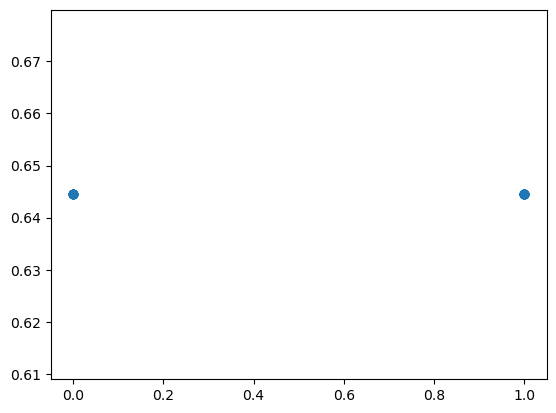

In [33]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : ",mae)
print('R2 Score : ',score)
plt.scatter(y_test,y_pred)

Mean Absolute Error :  0.4580645161290323
R2 Score :  -2.24466891185493e-06


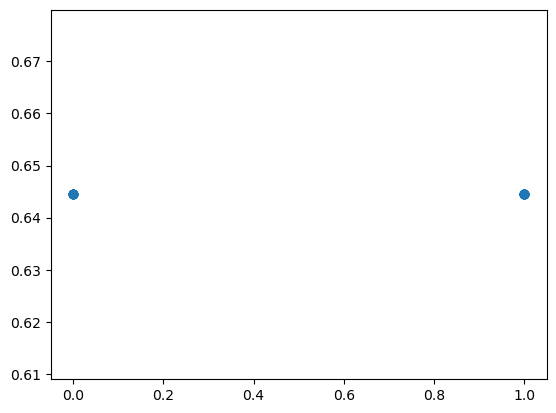

In [34]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : ",mae)
print('R2 Score : ',score)
plt.scatter(y_test,y_pred)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Performance Check
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Absolute Error: 0.030645161290322583
R2 Score: 0.9330822727272727


In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'n_estimators': 100}


Mean Absolute Error: 0.030645161290322583
R2 Score: 0.9330822727272727


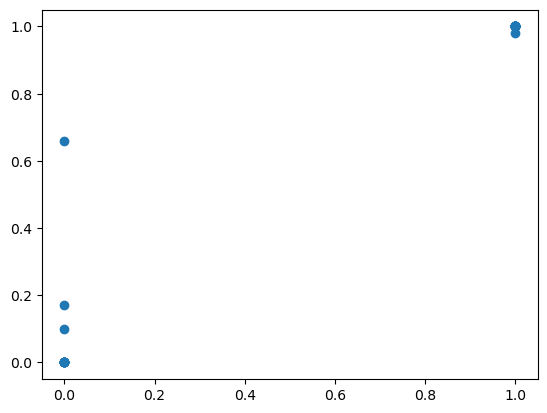

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Performance Check
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)
plt.scatter(y_test,y_pred)

In [38]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# XGBoost Model Banayein
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Model Train Karein
xgb.fit(X_train, y_train)

# Predictions Nikalein
y_pred_xgb = xgb.predict(X_test)

# Model Evaluate Karein
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("🔹 Mean Absolute Error (XGBoost):", mae_xgb)
print("🔹 R² Score (XGBoost):", r2_xgb)


🔹 Mean Absolute Error (XGBoost): 9.217959896270787e-05
🔹 R² Score (XGBoost): 0.9999999403953552


In [39]:
# training vs testing data 
train_pred = xgb.predict(X_train)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, y_pred_xgb)

print("🔹 Train R² Score:", train_r2)
print("🔹 Test R² Score:", test_r2)


🔹 Train R² Score: 0.9999999403953552
🔹 Test R² Score: 0.9999999403953552


In [44]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='r2')
print("🔹 Cross-Validation R² Scores:", cv_scores)
print("🔹 Mean CV R² Score:", cv_scores.mean())




🔹 Cross-Validation R² Scores: [0.99999994 0.99999994 0.99999994 0.4463169  0.99999994]
🔹 Mean CV R² Score: 0.8892633318901062


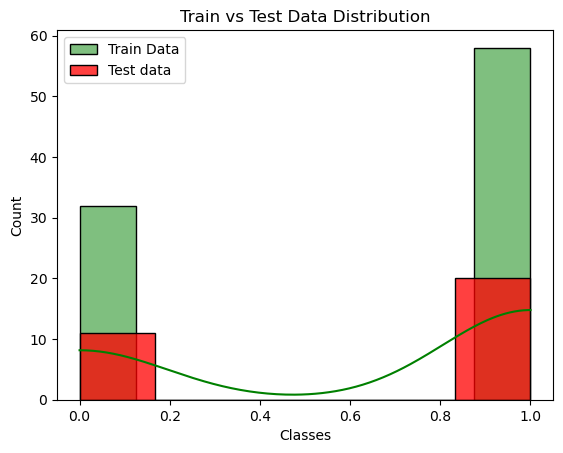

In [50]:
plt.Figure(figsize=(10,5))
sns.histplot(y_train,label='Train Data', kde=True,color='green')
sns.histplot(y_test,label='Test data ',kde=False,color='red')
plt.legend()
plt.title("Train vs Test Data Distribution")
plt.show()

In [ ]:
from sklearn.model_selection import KFold , cross_val_score

skf = KFold(n_splits=5,shuffle=True,random_state=42)
cv_scores = cross_val_score(xgb, X_train, y_train, cv=skf, scoring='r2')
print("🔹 Cross-Validation R² Scores:", cv_scores)
print("Mean Stratified CV R2 score",cv_scores.mean())





🔹 Cross-Validation R² Scores: [0.99999994 0.99999994 0.99999994 0.43765134 0.99999994]
Mean Stratified CV R2 score 0.8875302195549011


In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("🔹 Balanced Class Distribution:", dict(pd.Series(y_train_bal).value_counts()))


🔹 Balanced Class Distribution: {1: 58, 0: 58}
